In [1]:
from yty_manim.application.page_replacement import *
from manim import *

Manim Community v0.18.0

In [2]:
%%manim -qh -v WARNING PageTest
class PageTest(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        p = FifoPageReplacement(input_lst,page_frame_num=3)
        self.add(p)
        self.wait()
        for i in range(len(input_lst)-1):
            step_on(self,p,i,0.5)

IndexError: list index out of range

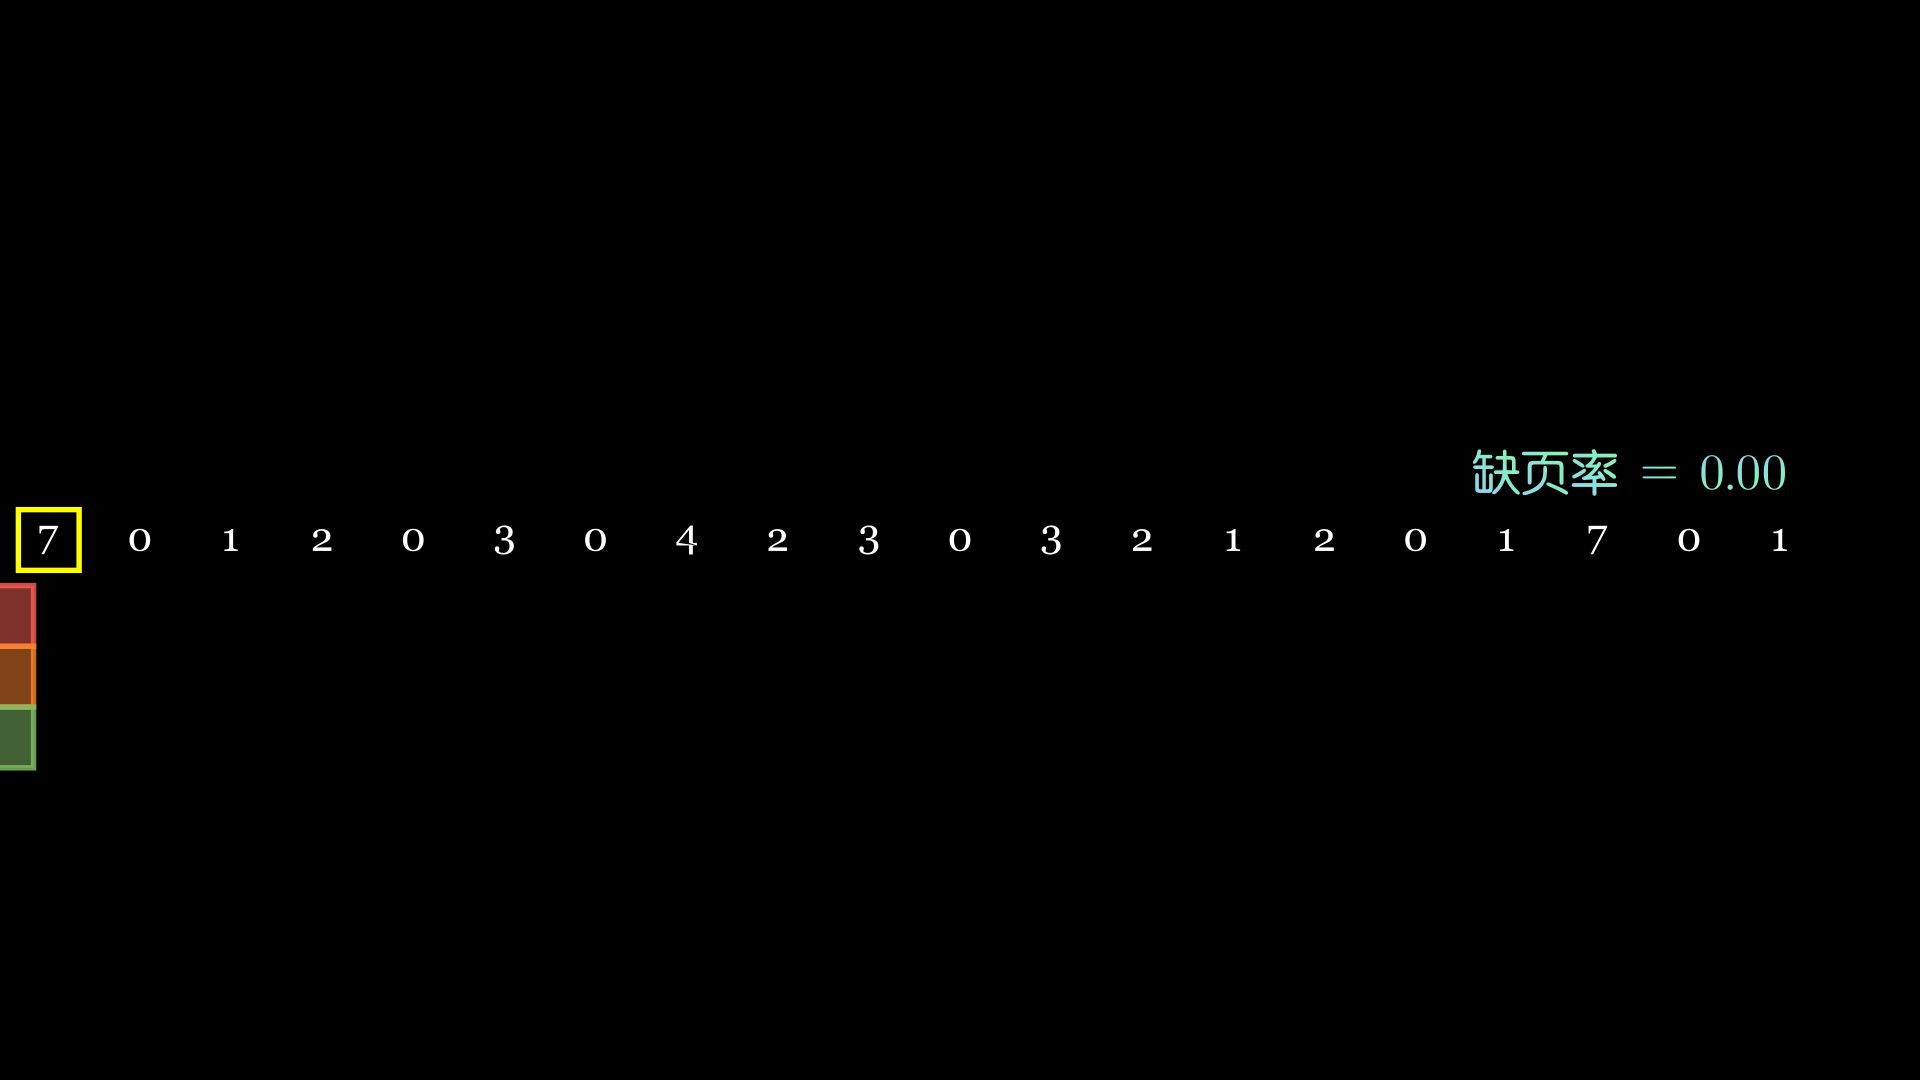

In [2]:
%%manim -qh -v WARNING PageInit
class PageInit(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        p = Page(input_lst,page_frame_num=3)
        self.add(p)